In [4]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing

# Creating Raw Diamond Images Dataset

In [5]:
# E.g., cuishons directory and corresponding csv for cuishons 
# Returns comma-separated values (csv) file is returned as two-dimensional data structure with labeled axes.
def extract_data(stone_directory, stone_csv):
    csv_data = np.asarray(pd.read_csv(stone_csv))

    # parallel arrays with corresponding indices
    clarity = []
    id = []
    image_directory = []
    for row in range(len(csv_data)):

        id.append(csv_data[row][0])
        stone_directory
        for root, _, files in os.walk(stone_directory):
            for name in files:
                # print(name)
                # print(id[0])
                if name.split(".")[0]==(str(csv_data[row][0])):
                    # print(name.split(".")[0])
                    image_directory.append(os.path.join(root, name))
                    clarity.append(csv_data[row][3])

    return image_directory, clarity

In [6]:
# get corresponding marquies diamond images directories and labels
marquise_id, marquise_clarity= extract_data("images/marquise", "data_marquise.csv")

In [4]:
# get corresponding cushion diamond images directories and labels
cushion_id, cushion_clarity = extract_data("images/cushion", "data_cushion.csv")

In [5]:
# get corresponding emerald diamond images directories and labels
emerald_id, emerald_clarity = extract_data("images/emerald", "data_emerald.csv")

In [6]:
# get corresponding heart diamond images directories and labels
heart_id, heart_clarity = extract_data("images/heart", "data_heart.csv")

In [7]:
# get corresponding oval diamond images directories and labels
oval_id, oval_clarity = extract_data("images/oval", "data_oval.csv")

In [8]:
# get corresponding pear diamond images directories and labels
pear_id, pear_clarity = extract_data("images/pear", "data_pear.csv")

In [9]:
# get corresponding princess diamond images directories and labels
princess_id, princess_clarity = extract_data("images/princess", "data_princess.csv")

In [10]:
# get corresponding round diamond images directories and labels
round_id, round_clarity = extract_data("images/round", "data_round.csv")

In [8]:
# load in images 
def load_images(path):
    images = []
    for file in path:
        img = cv2.imread(file)
        if img is not None:
            images.append(img)
    return images 

In [12]:
# load in cushion images where image shape is only 300*300*3
cushion2 = load_images(cushion_id)
for i in range(len(cushion2)-1):
    if cushion2[i].shape != (300, 300, 3):
        cushion2.remove(cushion2[i])
        del cushion_clarity[i]

cushion2 = np.array(cushion2)
print(cushion2.shape)
print(len(cushion_clarity))

(1004, 300, 300, 3)
1004


/tmp/ipykernel_48647/1550823048.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  cushion2.remove(cushion2[i])


In [13]:
# load in marquise images 
marquise2 = load_images(marquise_id)
marquise2 = np.array(marquise2)
marquise2.shape

(63, 300, 300, 3)

In [14]:
# load in emerald images 
emerald2 = load_images(emerald_id)
emerald2 = np.array(emerald2)
emerald2.shape

(545, 300, 300, 3)

In [15]:
# load in heart images 
heart2 = load_images(heart_id)
heart2 = np.array(heart2)
heart2.shape

(329, 300, 300, 3)

In [16]:
# load in oval images 
oval2 = load_images(oval_id)
oval2 = np.array(oval2)
oval2.shape

(629, 300, 300, 3)

In [17]:
# load in pear images 
pear2 = load_images(pear_id)
pear2 = np.array(pear2)
pear2.shape

(301, 300, 300, 3)

In [18]:
# load in princess images 
princess2 = load_images(princess_id)
princess2 = np.array(princess2)
princess2.shape

(581, 300, 300, 3)

In [19]:
# load in round images 
round2 = load_images(round_id)
round2 = np.array(round2)
round2.shape

(1535, 300, 300, 3)

In [20]:
# concatenate all the images together 
all_images_temp = np.concatenate((cushion2, emerald2, heart2, marquise2, oval2, pear2, princess2, round2), axis = 0)
all_images_temp.shape

(4987, 300, 300, 3)

In [21]:
# concatenate all the labels together 
all_labels = cushion_clarity + emerald_clarity + heart_clarity + marquise_clarity + oval_clarity + pear_clarity + princess_clarity + round_clarity
len(all_labels)

4987

In [22]:
# convert all the images to data type float32 and divide each pixel value by 255 
all_images = np.zeros((4987, 300, 300, 3))
for i in range(len(all_images_temp)):
    all_images[i] = all_images_temp[i].astype(np.float32)
    all_images[i] = all_images[i] / 255

(4987, 300, 300, 3)


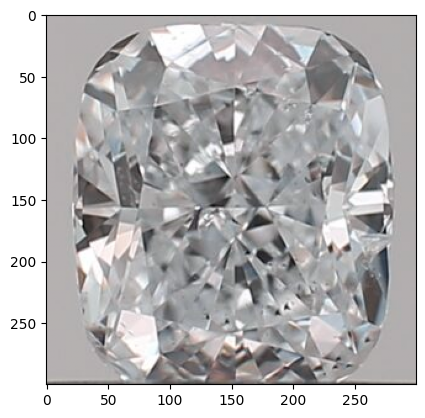

In [23]:
print(all_images.shape)
plt.imshow(all_images[0])

In [24]:
# find all the indices where the label value is NA 
temp = []
for i in range(len(all_labels)):
    if pd.isna(all_labels[i]) == True:
        temp.append(i)
print(temp)

[29, 149, 156, 240, 288, 333, 336, 346, 428, 563, 641, 654, 691, 767, 868, 886, 2071, 2235, 2376]


In [25]:
all_labels = np.array(all_labels)
all_labels

array(['SI2', 'VVS1', 'VS2', ..., 'SI1', 'SI1', 'VS1'], dtype='<U32')

In [26]:
# delete all the labels where it is NA 
all_labels = np.delete(all_labels, temp)

In [27]:
all_labels.shape

(4968,)

In [28]:
# there are no NA label any more 
set(all_labels)

{'FL', 'I1', 'I2', 'I3', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

In [29]:
# delete all the numbers inside the labels
for i in range(len(all_labels)):
    all_labels[i] = all_labels[i].rstrip("1,2,3")

In [30]:
# there are six clarity levels left 
set(all_labels)

{'FL', 'I', 'IF', 'SI', 'VS', 'VVS'}

In [31]:
# delete all images where its label is NA 
all_images = np.delete(all_images, temp, axis = 0)

In [32]:
print(all_images.shape)

(4968, 300, 300, 3)


In [33]:
# encode character labels into integer labels
le = preprocessing.LabelEncoder()
le.fit(all_labels)
all_labels_int = le.transform(all_labels)
print(all_labels_int.shape)
print(all_labels_int[0:10])

(4968,)
[3 5 4 4 3 5 3 3 5 4]


In [34]:
# convert integer labels back to character labels 
le.inverse_transform(all_labels_int)[0:10]

array(['SI', 'VVS', 'VS', 'VS', 'SI', 'VVS', 'SI', 'SI', 'VVS', 'VS'],
      dtype='<U32')

In [35]:
# shuffling the images and labels 
new_index = np.arange(all_images.shape[0])
new_shuffle_index = tf.random.shuffle(new_index)
new_images = all_images[new_shuffle_index]
new_labels = all_labels_int[new_shuffle_index]

2022-12-14 18:10:19.787777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 18:10:21.177968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22825 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:61:00.0, compute capability: 7.5
2022-12-14 18:10:21.179610: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22825 MB memory:  -> device: 1, name: NVIDIA TITAN RTX, pci bus id: 0000:64:00.0, compute capability: 7.5


In [36]:
print(new_images.shape)
print(new_labels.shape)

(4968, 300, 300, 3)
(4968,)


In [37]:
# one-hot encode the labels 
new_labels_onehot = tf.one_hot(new_labels, depth = 6, dtype = tf.uint8)
print(np.shape(new_labels_onehot))
print(new_labels_onehot[0])

(4968, 6)
tf.Tensor([0 0 0 0 1 0], shape=(6,), dtype=uint8)


# Creating Diamond Images with Interest Points Dataset

In [7]:
# # get corresponding diamond images directories and labels
marquise_id2, marquise_clarity2= extract_data("images_harris/marquise", "data_marquise.csv")
cushion_id2, cushion_clarity2 = extract_data("images_harris/cushion", "data_cushion.csv")
emerald_id2, emerald_clarity2 = extract_data("images_harris/emerald", "data_emerald.csv")
heart_id2, heart_clarity2 = extract_data("images_harris/heart", "data_heart.csv")
oval_id2, oval_clarity2 = extract_data("images_harris/oval", "data_oval.csv")
pear_id2, pear_clarity2 = extract_data("images_harris/pear", "data_pear.csv")
princess_id2, princess_clarity2 = extract_data("images_harris/princess", "data_princess.csv")
round_id2, round_clarity2 = extract_data("images_harris/round", "data_round.csv")

In [9]:
# load in diamond images 
marquise_harris = load_images(marquise_id2)
marquise_harris = np.array(marquise_harris)
cushion_harris = load_images(cushion_id2)
cushion_harris = np.array(cushion_harris)
emerald_harris = load_images(emerald_id2)
emerald_harris = np.array(emerald_harris)
heart_harris = load_images(heart_id2)
heart_harris = np.array(heart_harris)
oval_harris = load_images(oval_id2)
oval_harris = np.array(oval_harris)
pear_harris = load_images(pear_id2)
pear_harris = np.array(pear_harris)
princess_harris = load_images(princess_id2)
princess_harris = np.array(princess_harris)
round_harris = load_images(round_id2)
round_harris = np.array(round_harris)

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_29525/743274630.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cushion_harris = np.array(cushion_harris)


In [40]:
cushion_harris = np.delete(cushion_harris, 124, axis = 0)
cushion_harris = np.stack(cushion_harris, axis = 0)
del cushion_clarity2[124]

In [41]:
print(cushion_harris.shape)
print(len(cushion_clarity2))

(1004, 300, 300, 3)
1004


In [42]:
# # concatenate all the images and labels together 
all_images_temp2 = np.concatenate((cushion_harris, emerald_harris, heart_harris, marquise_harris, oval_harris, pear_harris, princess_harris, round_harris), axis = 0)
print(all_images_temp2.shape)
all_labels2 = cushion_clarity2 + emerald_clarity2 + heart_clarity2 + marquise_clarity2 + oval_clarity2 + pear_clarity2 + princess_clarity2 + round_clarity2
print(len(all_labels2))

(4987, 300, 300, 3)
4987


In [43]:
# convert all the images to data type float32 and divide each pixel value by 255 
all_images_harris = np.zeros((4987, 300, 300, 3))
for i in range(len(all_images_temp2)):
    all_images_harris[i] = all_images_temp2[i].astype(np.float32)
    all_images_harris[i] = all_images_harris[i] / 255

(4987, 300, 300, 3)


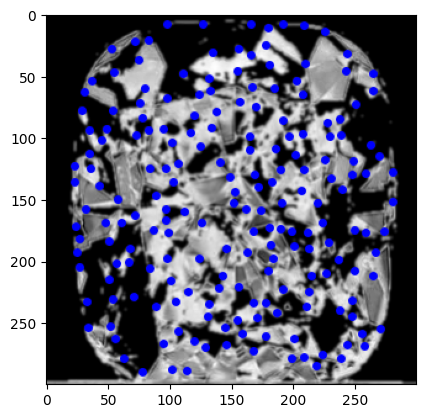

In [44]:
print(all_images_harris.shape)
plt.imshow(all_images_harris[0])

In [45]:
all_images_harris[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.31764706, 0.31764706, 0.31764706],
        [0.31764706, 0.31764706, 0.31764706],
        [0.31764706, 0

In [46]:
# find all the indices where the label value is NA 
temp = []
for i in range(len(all_labels2)):
    if pd.isna(all_labels2[i]) == True:
        temp.append(i)
print(temp)

[29, 149, 156, 240, 288, 333, 336, 346, 428, 563, 641, 654, 691, 767, 868, 886, 2071, 2235, 2376]


In [47]:
all_labels2 = np.array(all_labels2)
all_labels2

array(['SI2', 'VVS1', 'VS2', ..., 'SI1', 'SI1', 'VS1'], dtype='<U32')

In [48]:
# delete all the labels where it is NA 
all_labels2 = np.delete(all_labels2, temp)

In [49]:
print(all_labels2.shape)
set(all_labels2)

(4968,)


{'FL', 'I1', 'I2', 'I3', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

In [50]:
# delete all the numbers inside the labels
for i in range(len(all_labels2)):
    all_labels2[i] = all_labels2[i].rstrip("1,2,3")

In [51]:
print(all_labels2.shape)
set(all_labels2)

(4968,)


{'FL', 'I', 'IF', 'SI', 'VS', 'VVS'}

In [52]:
# delete all images where its label is NA 
all_images_harris = np.delete(all_images_harris, temp, axis = 0)
print(all_images_harris.shape)

(4968, 300, 300, 3)


In [53]:
# encode character labels into integer labels
le2 = preprocessing.LabelEncoder()
le2.fit(all_labels2)
all_labels_int2 = le.transform(all_labels2)
print(all_labels_int2.shape)
print(all_labels_int2[0:10])

(4968,)
[3 5 4 4 3 5 3 3 5 4]


In [54]:
# convert integer labels back to character labels 
le2.inverse_transform(all_labels_int2)[0:10]

array(['SI', 'VVS', 'VS', 'VS', 'SI', 'VVS', 'SI', 'SI', 'VVS', 'VS'],
      dtype='<U32')

In [55]:
# shuffling the images and labels 
new_index2 = np.arange(all_images_harris.shape[0])
new_shuffle_index2 = tf.random.shuffle(new_index2)
new_images2 = all_images_harris[new_shuffle_index2]
new_labels2 = all_labels_int2[new_shuffle_index2]

In [56]:
print(new_images2.shape)
print(new_labels2.shape)

(4968, 300, 300, 3)
(4968,)


In [57]:
# one-hot encode the labels 
new_labels_onehot2 = tf.one_hot(new_labels2, depth = 6, dtype = tf.uint8)
print(np.shape(new_labels_onehot2))
print(new_labels_onehot2[0])

(4968, 6)
tf.Tensor([0 0 0 0 1 0], shape=(6,), dtype=uint8)


# Training the Model with raw diamond images 

In [103]:
from tensorflow.keras.layers import \
    Conv2D, MaxPool2D, Dropout, Flatten, Dense

In [104]:
# the CNN architecture for clarity level classification for diamonds 
class DLmodel(tf.keras.Model):
    """ Your own neural network model. """

    def __init__(self):
        super(DLmodel, self).__init__()
        
        self.architecture = [
            # Block 1
            Conv2D(64, 3, 1, padding="same",
                   activation="relu", name="block1_conv1"),
            Conv2D(64, 3, 1, padding="same",
                   activation="relu", name="block1_conv2"),
            MaxPool2D(2, name="block1_pool"),
            # Block 2
            Conv2D(128, 3, 1, padding="same",
                   activation="relu", name="block2_conv1"),
            Conv2D(128, 3, 1, padding="same",
                   activation="relu", name="block2_conv2"),
            MaxPool2D(2, name="block2_pool"),
            # Block 3
            Conv2D(256, 3, 1, padding="same",
                   activation="relu", name="block3_conv1"),
            Conv2D(256, 3, 1, padding="same",
                   activation="relu", name="block3_conv2"),
            Conv2D(256, 3, 1, padding="same",
                   activation="relu", name="block3_conv3"),
            MaxPool2D(2, name="block3_pool"),
            # Block 4
            Conv2D(512, 3, 1, padding="same",
                   activation="relu", name="block4_conv1"),
            Conv2D(512, 3, 1, padding="same",
                   activation="relu", name="block4_conv2"),
            Conv2D(512, 3, 1, padding="same",
                   activation="relu", name="block4_conv3"),
            MaxPool2D(2, name="block4_pool"),
            # Block 5
            Conv2D(512, 3, 1, padding="same",
                   activation="relu", name="block5_conv1"),
            Conv2D(512, 3, 1, padding="same",
                   activation="relu", name="block5_conv2"),
            Conv2D(512, 3, 1, padding="same",
                   activation="relu", name="block5_conv3"),
            MaxPool2D(2, name="block5_pool"),
            # Feed-forward
            Flatten(),
            Dense(128, activation = "relu"),
            Dense(64, activation = "relu"),
            Dense(6, activation = "softmax")
        ]
       
        

    def call(self, x):
        """ Passes input image through the network. """

        for layer in self.architecture:
            x = layer(x)

        return x

In [105]:
DL_model = DLmodel()
DL_model.build(input_shape=new_images[0:10].shape)
DL_model.summary()

Model: "d_lmodel_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       multiple                  1792      
                                                                 
 block1_conv2 (Conv2D)       multiple                  36928     
                                                                 
 block1_pool (MaxPooling2D)  multiple                  0         
                                                                 
 block2_conv1 (Conv2D)       multiple                  73856     
                                                                 
 block2_conv2 (Conv2D)       multiple                  147584    
                                                                 
 block2_pool (MaxPooling2D)  multiple                  0         
                                                                 
 block3_conv1 (Conv2D)       multiple                  2

In [106]:
# creating training set for diamond images 
all_images_train = new_images[0:4000]
all_images_train.shape

(4000, 300, 300, 3)

In [107]:
# creating testing set for diamond images 
all_images_test = new_images[4000:4965]
all_images_test.shape

(965, 300, 300, 3)

In [108]:
# creating training and testing labels for diamond images 
all_labels_int_train = new_labels_onehot[0:4000]
all_labels_int_test = new_labels_onehot[4000:4965]

In [109]:
all_labels_int_train = np.array(all_labels_int_train)
all_labels_int_test = np.array(all_labels_int_test)
print(all_labels_int_train.shape)
print(all_labels_int_test.shape)

(4000, 6)
(965, 6)


In [110]:
# optimizer, loss, and metrics used for training 
DL_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
# The difference between sparse_categorical_crossentropy and categorical_crossentropy is whether your labels are one-hot encoded.

In [116]:
# training the model 
history2 = DL_model.fit(
    all_images_train,
    all_labels_int_train,
    epochs = 20,
    batch_size = 5)

Epoch 1/20
800/800 [==============================] - 46s 58ms/step - loss: 1.1283 - accuracy: 0.4115
Epoch 2/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1274 - accuracy: 0.4085
Epoch 3/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1272 - accuracy: 0.4130
Epoch 4/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1276 - accuracy: 0.4095
Epoch 5/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1274 - accuracy: 0.3890
Epoch 6/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1275 - accuracy: 0.3960
Epoch 7/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1272 - accuracy: 0.4002
Epoch 8/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1261 - accuracy: 0.4178
Epoch 9/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1275 - accuracy: 0.4033
Epoch 10/20
800/800 [==============================] - 47s 59ms/step - loss: 1.126

/tmp/ipykernel_48647/416206905.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='black')


Text(0.5, 1.0, 'Accuracy for training on all raw diamond images')

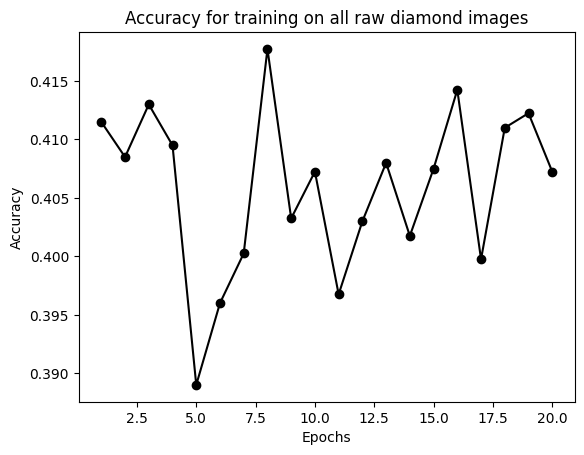

In [117]:
# plotting the accuracy graph
y = history2.history['accuracy']
x = np.arange(20)
x = x+1
plt.plot(x, y, '-ok', color='black')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy for training on all raw diamond images")

/tmp/ipykernel_48647/1228290906.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='black')


Text(0.5, 1.0, 'Loss for training on all raw diamond images')

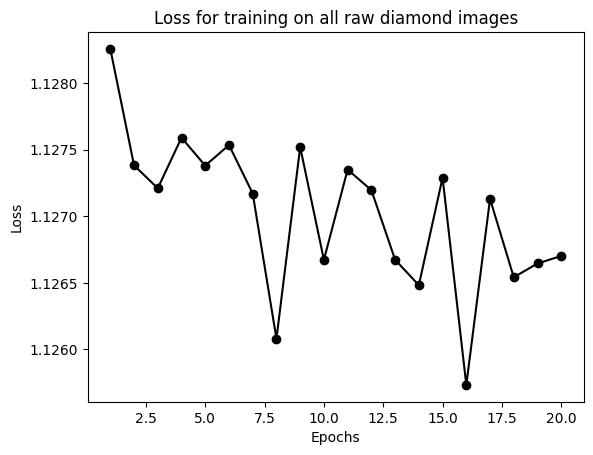

In [118]:
# plotting the loss graph
y = history2.history['loss']
x = np.arange(20)
x = x+1
plt.plot(x, y, '-ok', color='black')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss for training on all raw diamond images")

In [76]:
# testing the model 
DL_model.evaluate(all_images_test, all_labels_int_test, batch_size = 5)

193/193 [==============================] - 4s 20ms/step - loss: 1.1190 - accuracy: 0.3731


[1.1190431118011475, 0.3730570077896118]

In [77]:
# predicting on first 20 images in test set 
predictions = DL_model.predict(all_images_test[0:20])
print(predictions.shape)

1/1 [==============================] - 3s 3s/step
(20, 6)


In [78]:
# our predictions 
answers = []
for i in range(len(predictions)):
    pred = predictions[i]
    pred_int = np.argmax(pred)
    answers.append(pred_int)

In [79]:
# actual labels 
true_answers = []
for i in range(len(all_labels_int_test[0:20])):
    pred = all_labels_int_test[i]
    pred_int = np.argmax(pred)
    true_answers.append(pred_int)

In [80]:
print(answers)
print(true_answers)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 2, 3, 4, 3, 5, 4, 3, 3, 3, 4, 4, 3, 3, 4, 5, 4, 3, 4, 5]


In [81]:
# transform predictions back to character labels 
le.inverse_transform(answers)

array(['VS', 'VS', 'VS', 'VS', 'VS', 'VS', 'VS', 'VS', 'VS', 'VS', 'VS',
       'VS', 'VS', 'VS', 'VS', 'VS', 'VS', 'VS', 'VS', 'VS'], dtype='<U32')

In [82]:
# transform labels back to character labels 
le.inverse_transform(true_answers)

array(['VS', 'IF', 'SI', 'VS', 'SI', 'VVS', 'VS', 'SI', 'SI', 'SI', 'VS',
       'VS', 'SI', 'SI', 'VS', 'VVS', 'VS', 'SI', 'VS', 'VVS'],
      dtype='<U32')

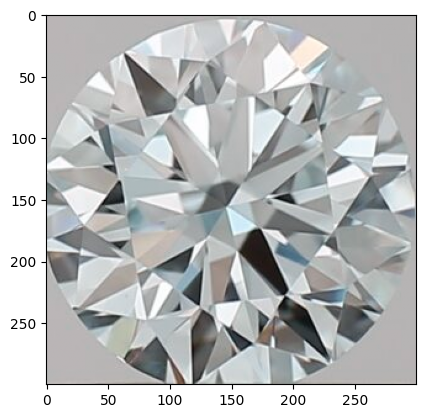

In [102]:
plt.imshow(all_images_test[0])

# Training the Model with diamond images with interest points 

In [83]:
DL_model2 = DLmodel()
DL_model2.build(input_shape=round_images_train[0:5].shape)
DL_model2.summary()

Model: "d_lmodel_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       multiple                  1792      
                                                                 
 block1_conv2 (Conv2D)       multiple                  36928     
                                                                 
 block1_pool (MaxPooling2D)  multiple                  0         
                                                                 
 block2_conv1 (Conv2D)       multiple                  73856     
                                                                 
 block2_conv2 (Conv2D)       multiple                  147584    
                                                                 
 block2_pool (MaxPooling2D)  multiple                  0         
                                                                 
 block3_conv1 (Conv2D)       multiple                  2

In [84]:
# creating training set for diamond images with interest points  
all_images_harris_train = new_images2[0:4000]
all_images_harris_train.shape

(4000, 300, 300, 3)

In [85]:
# creating testing set for diamond images with interest points  
all_images_harris_test = new_images2[4000:4965]
all_images_harris_test.shape

(965, 300, 300, 3)

In [86]:
# creating training and testing labels for diamond images 
all_labels_harris_int_train = new_labels_onehot2[0:4000]
all_labels_harris_int_test = new_labels_onehot2[4000:4965]

In [87]:
all_labels_harris_int_train = np.array(all_labels_harris_int_train)
all_labels_harris_int_test = np.array(all_labels_harris_int_test)
print(all_labels_harris_int_train.shape)
print(all_labels_harris_int_test.shape)

(4000, 6)
(965, 6)


In [88]:
# optimizer, loss, and metrics used for training 
DL_model2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [89]:
# training the model 
history = DL_model2.fit(
    all_images_harris_train,
    all_labels_harris_int_train,
    epochs = 20,
    batch_size = 5)

Epoch 1/20
800/800 [==============================] - 48s 59ms/step - loss: 1.1590 - accuracy: 0.4062
Epoch 2/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1376 - accuracy: 0.4040
Epoch 3/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1336 - accuracy: 0.4035
Epoch 4/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1324 - accuracy: 0.4060
Epoch 5/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1333 - accuracy: 0.4142
Epoch 6/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1321 - accuracy: 0.4168
Epoch 7/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1294 - accuracy: 0.4050
Epoch 8/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1295 - accuracy: 0.4013
Epoch 9/20
800/800 [==============================] - 47s 59ms/step - loss: 1.1267 - accuracy: 0.4132
Epoch 10/20
800/800 [==============================] - 47s 59ms/step - loss: 1.129

/tmp/ipykernel_48647/2076725343.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='black')


Text(0.5, 1.0, 'Accuracy for training on all diamond images with interest points')

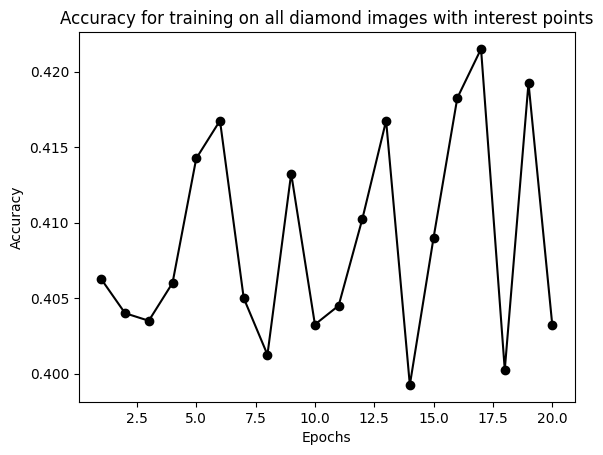

In [100]:
# plotting the accuracy graph
y = history.history['accuracy']
x = np.arange(20)
x = x+1
plt.plot(x, y, '-ok', color='black')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy for training on all diamond images with interest points")

/tmp/ipykernel_48647/2738102664.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='black')


Text(0.5, 1.0, 'Loss for training on all diamond images with interest points')

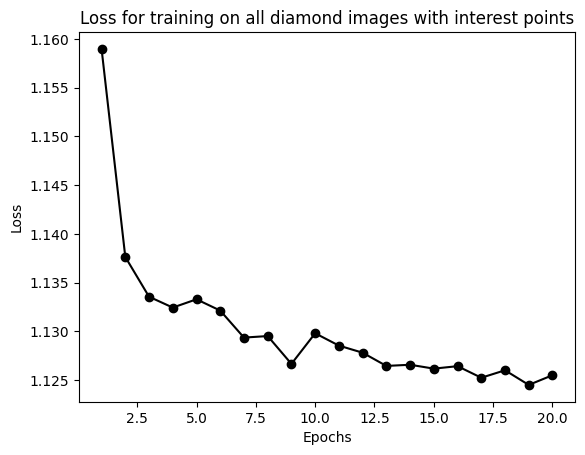

In [101]:
# plotting the loss graph
y = history.history['loss']
x = np.arange(20)
x = x+1
plt.plot(x, y, '-ok', color='black')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss for training on all diamond images with interest points")

In [91]:
# testing the model 
DL_model2.evaluate(all_images_harris_test, all_labels_harris_int_test, batch_size = 5)

193/193 [==============================] - 4s 20ms/step - loss: 1.1275 - accuracy: 0.3979


[1.1274832487106323, 0.397927463054657]

In [92]:
# predicting on first 20 images in test set 
predictions2 = DL_model2.predict(all_images_harris_test[0:20])
print(predictions2.shape)

1/1 [==============================] - 0s 150ms/step
(20, 6)


In [93]:
# our predictions 
answers2 = []
for i in range(len(predictions2)):
    pred = predictions2[i]
    pred_int = np.argmax(pred)
    answers2.append(pred_int)

In [94]:
# actual labels 
true_answers2 = []
for i in range(len(all_labels_harris_int_test[0:20])):
    pred = all_labels_harris_int_test[i]
    pred_int = np.argmax(pred)
    true_answers2.append(pred_int)

In [95]:
print(answers2)
print(true_answers2)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 5, 3, 4, 3, 5, 3, 4, 4, 3, 5, 4, 4, 4, 4, 3, 5, 3, 4, 3]


In [96]:
# transform predictions back to character labels 
le2.inverse_transform(answers2)

array(['SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI',
       'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI'], dtype='<U32')

In [97]:
# transform labels back to character labels 
le2.inverse_transform(true_answers2)

array(['SI', 'VVS', 'SI', 'VS', 'SI', 'VVS', 'SI', 'VS', 'VS', 'SI',
       'VVS', 'VS', 'VS', 'VS', 'VS', 'SI', 'VVS', 'SI', 'VS', 'SI'],
      dtype='<U32')

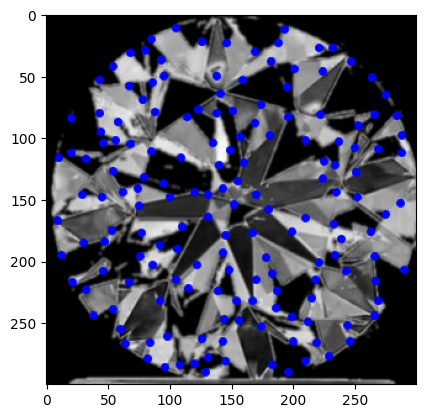

In [98]:
plt.imshow(all_images_harris_test[0])